In [1]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nixtlats import TimeGPT
%matplotlib inline

In [2]:
agg_monthly = pq.read_table('data/agg_monthly.parquet').to_pandas()

In [3]:
agg_monthly.head()

,RegionID,year,month,avg_temperature,max_temperature,min_temperature,avg_sunshine_duration,max_sunshine_duration,min_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,count_record,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,1000,1949,1,20.893548,22.9,17.4,36360.254516,46592.96,114.22,5.119355,5.119355,0.0,31,83.374497,8.215034,19.860537,0.455046
1,1000,1949,2,20.239286,23.5,15.0,39061.164286,45490.35,5610.33,2.839286,2.839286,0.0,28,80.038690,7.975744,19.858333,0.418362
2,1000,1949,3,20.719355,22.7,18.6,30877.352581,40876.61,0.00,5.893548,5.893548,0.0,31,85.978495,7.284409,20.569624,0.444293
3,1000,1949,4,15.953333,19.4,12.8,33343.093333,39559.54,0.00,2.126667,2.126667,0.0,30,82.226389,7.459028,17.799167,0.467942
4,1000,1949,5,13.887097,21.9,7.0,23280.035161,36306.69,0.00,5.925806,5.925806,0.0,31,85.336022,8.177823,15.398253,0.465198


In [4]:
# Filter weather data where RegionID is 1446 (Saint Emilion)
weather = agg_monthly[agg_monthly['RegionID'] == 1446]
weather.shape

(888, 17)

In [5]:
# Print max time
print(weather['year'].max(), weather['month'].max())

2022 12


In [6]:
# Add timestamp column
weather['timestamp'] = pd.to_datetime(weather[['year', 'month']].assign(DAY=1))

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_21476\3955383304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['timestamp'] = pd.to_datetime(weather[['year', 'month']].assign(DAY=1))


In [7]:
weather.head()

,RegionID,year,month,avg_temperature,max_temperature,min_temperature,avg_sunshine_duration,max_sunshine_duration,min_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,count_record,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture,timestamp
358752,1446,1949,1,5.825806,10.4,-0.1,18342.605161,31062.31,0.00,0.670968,0.670968,0.000000,31,84.663087,9.475839,7.078792,0.320863,1949-01-01
358753,1446,1949,2,6.492857,12.2,-0.6,25489.671786,36331.21,0.00,0.867857,0.867857,0.000000,28,79.016369,8.623363,6.293452,0.321446,1949-02-01
358754,1446,1949,3,8.058065,13.3,1.9,27606.070323,42302.73,0.00,1.435484,1.425806,0.006774,31,75.642473,9.825941,7.349328,0.330156,1949-03-01
358755,1446,1949,4,14.243333,19.5,8.1,37661.032333,46748.08,1198.61,1.163333,1.163333,0.000000,30,69.702778,10.581111,12.017083,0.313064,1949-04-01
358756,1446,1949,5,13.767742,17.9,10.5,39045.555806,50400.00,14707.69,1.935484,1.935484,0.000000,31,69.900538,10.642339,12.837097,0.284723,1949-05-01


In [8]:
time_gpt = TimeGPT(
    token='YOUR_TOKEN',
)

In [9]:
time_gpt.validate_token()

ApiError: status_code: 401, body: {'data': None, 'message': 'Invalid API key', 'details': 'Key not found', 'code': 'A12', 'requestID': 'HHLWC9KY29', 'support': 'If you have questions or need support, please email ops@nixtla.io'}

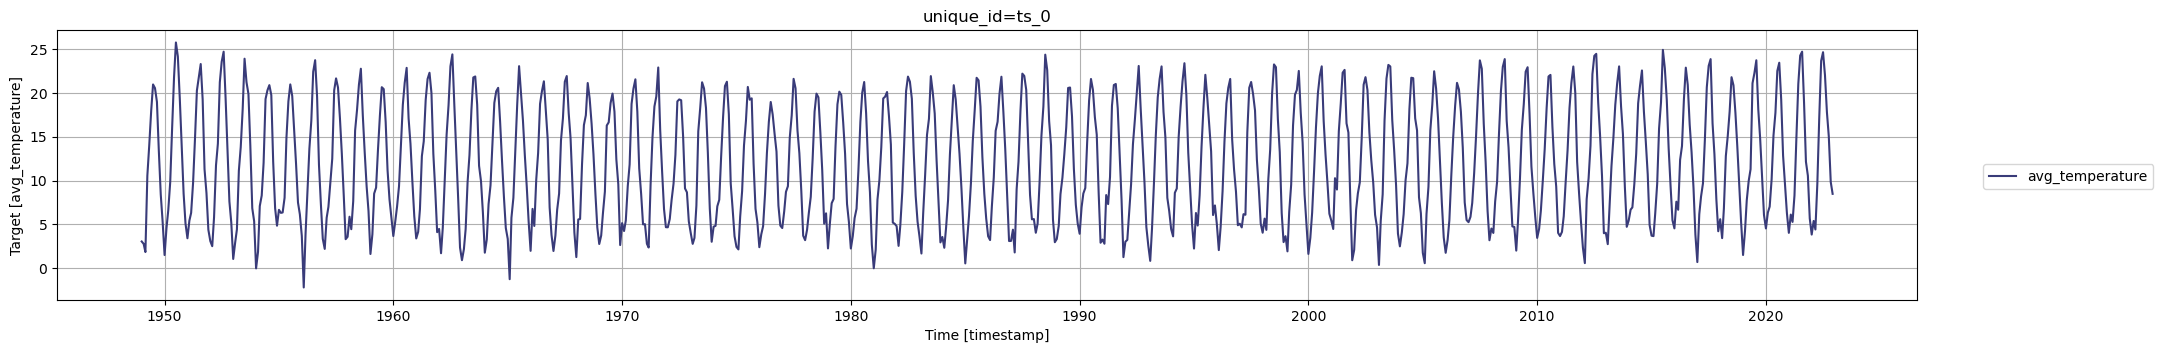

In [ ]:
# Plot the time series
time_gpt.plot(weather, time_col='timestamp', target_col='avg_temperature')

In [ ]:
target_col = weather.columns.to_list()
target_col.remove('RegionID')
target_col.remove('year')
target_col.remove('month')
target_col.remove('min_temperature')
target_col.remove('max_temperature')
target_col.remove('min_sunshine_duration')
target_col.remove('max_sunshine_duration')
target_col.remove('count_record')
target_col

['avg_temperature',
 'avg_sunshine_duration',
 'avg_precipitation',
 'avg_rain',
 'avg_snowfall',
 'avg_humidity',
 'avg_wind_speed',
 'avg_soil_temperature',
 'avg_soil_moisture',
 'timestamp']

## Forecast

In [ ]:
temp_forecast_df = time_gpt.forecast(weather, h=24, time_col='timestamp', target_col=target_col[0], freq='MS')
sunshine_forecast = time_gpt.forecast(weather, h=24, time_col='timestamp', target_col=target_col[1], freq='MS')
precipitation_forecast = time_gpt.forecast(weather, h=24, time_col='timestamp', target_col=target_col[2], freq='MS')

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


In [ ]:
humidity_forecast = time_gpt.forecast(weather, h=24, time_col='timestamp', target_col=target_col[5], freq='MS')
soil_temperature_forecast = time_gpt.forecast(weather, h=24, time_col='timestamp', target_col=target_col[7], freq='MS')
soil_moisture_forecast = time_gpt.forecast(weather, h=24, time_col='timestamp', target_col=target_col[8], freq='MS')

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


In [ ]:
temp_forecast_df

,timestamp,TimeGPT
0,2023-01-01,7.099432
1,2023-02-01,10.756770
2,2023-03-01,12.638821
3,2023-04-01,14.704250
4,2023-05-01,18.240776
5,2023-06-01,22.157433
6,2023-07-01,24.012362
7,2023-08-01,24.556046
8,2023-09-01,21.655415
9,2023-10-01,18.160902


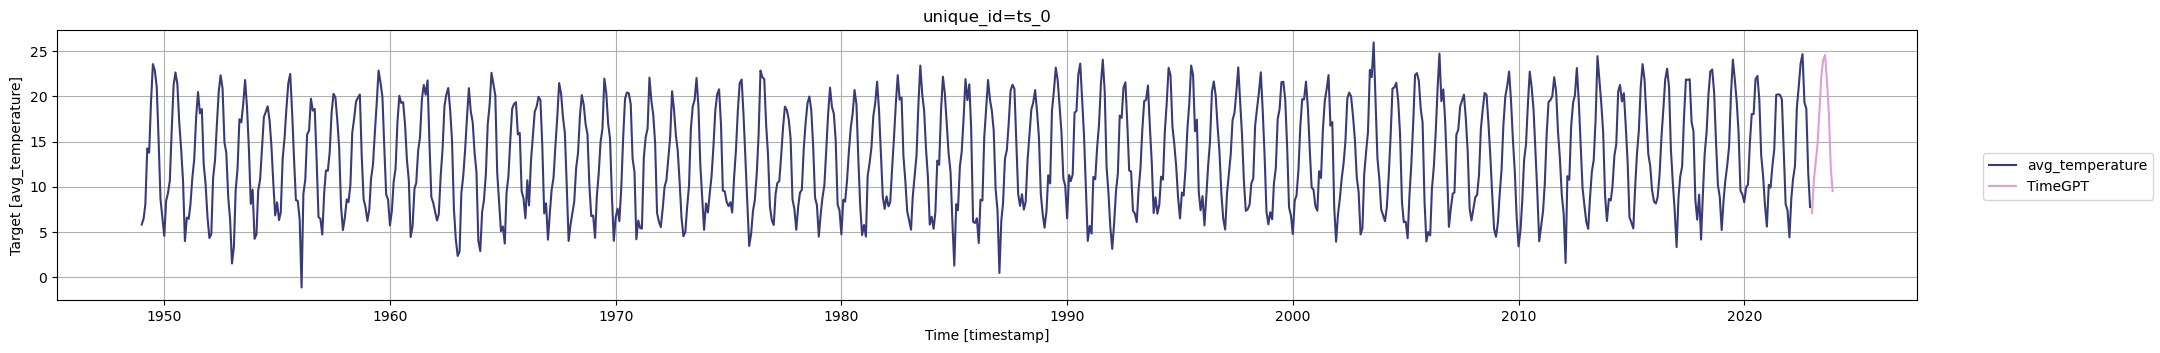

In [ ]:
# Plot the forecast
time_gpt.plot(weather, temp_forecast_df, time_col='timestamp', target_col=target_col[0])

## Get WineID == 111446 (Saint Emilion Grand Cru Premiere Classe)

In [ ]:
# Read Wine data
wine_df = pd.read_csv('./data/wines.csv')
wine_df.head()

,WineID,WineName,Type,Elaborate,ABV,Body,Acidity,RegionID,WineryID
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High,1001,10001
1,100002,Ancellotta,Red,Varietal/100%,12.0,Medium-bodied,Medium,1001,10001
2,100003,Cabernet Sauvignon,Red,Varietal/100%,12.0,Full-bodied,High,1001,10002
3,100004,Virtus Moscato,White,Varietal/100%,12.0,Medium-bodied,Medium,1001,10003
4,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,11.0,Full-bodied,Medium,1001,10000


In [ ]:
## Label Encoding
acid_dict = {'Low': 1, 'Medium': 2, 'High': 3}
body_dict = {'Light-bodied': 1, 'Medium-bodied': 2, 'Full-bodied': 3, 'Very full-bodied': 4}

wine_df['Acidity'] = wine_df['Acidity'].map(acid_dict)
wine_df['Body'] = wine_df['Body'].map(body_dict)

In [ ]:
# Get Wine data for Saint Emilion
wine_df = wine_df[wine_df['WineID'] == 111446]
wine_df.head()

,WineID,WineName,Type,Elaborate,ABV,Body,Acidity,RegionID,WineryID
11424,111446,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,Red,1.0,13.2,3.0,2,1446,31555


## Turn weather data into list of numpy arrays

In [ ]:
batch_vintage = 2023
batch_vintage_2 = 2024
rating_year = 2024

In [ ]:
list_avg_temperature = temp_forecast_df['TimeGPT'].to_list()
list_avg_sunshine_duration = sunshine_forecast['TimeGPT'].to_list()
list_avg_precipitation = precipitation_forecast['TimeGPT'].to_list()
list_avg_humidity = humidity_forecast['TimeGPT'].to_list()
list_avg_soil_temperature = soil_temperature_forecast['TimeGPT'].to_list()
list_avg_soil_moisture = soil_moisture_forecast['TimeGPT'].to_list()

In [ ]:
length = len(list_avg_temperature)
length

24

In [ ]:
list_ABV = wine_df['ABV'].to_list() * length
list_body = wine_df['Body'].to_list() * length
list_acidity = wine_df['Acidity'].to_list() * length
list_acidity

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [ ]:
column_minmax = ['ABV',
 'Body',
 'Acidity',
 'avg_temperature',
 'avg_sunshine_duration',
 'avg_precipitation',
 'avg_humidity',
 'avg_soil_temperature',
 'avg_soil_moisture']

In [ ]:
minmax_df = pd.DataFrame(columns=column_minmax)

minmax_df['ABV'] = list_ABV
minmax_df['Body'] = list_body
minmax_df['Acidity'] = list_acidity
minmax_df['avg_temperature'] = list_avg_temperature
minmax_df['avg_sunshine_duration'] = list_avg_sunshine_duration
minmax_df['avg_precipitation'] = list_avg_precipitation
minmax_df['avg_humidity'] = list_avg_humidity
minmax_df['avg_soil_temperature'] = list_avg_soil_temperature
minmax_df['avg_soil_moisture'] = list_avg_soil_moisture
minmax_df.head()

,Elaborate,ABV,Body,Acidity,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,1.0,13.2,3.0,2,7.099432,17248.878906,2.315419,0,0,83.629723,0,9.444550,0.415602
1,1.0,13.2,3.0,2,10.756770,21354.554688,2.308655,0,0,80.309372,0,11.078191,0.417234
2,1.0,13.2,3.0,2,12.638821,26797.083984,1.972503,0,0,75.615067,0,12.015591,0.374646
3,1.0,13.2,3.0,2,14.704250,30468.179688,2.140577,0,0,71.968773,0,14.106025,0.306178
4,1.0,13.2,3.0,2,18.240776,36194.589844,2.292807,0,0,72.152992,0,17.070354,0.274705


In [ ]:
list_delta_time_rating = [rating_year - batch_vintage] * 12
list_delta_time_rating

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
list_delta_time_rating_2 = [rating_year - batch_vintage_2] * 12
list_delta_time_rating_2

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# Merge delta time rating
list_delta_time_rating = list_delta_time_rating + list_delta_time_rating_2
list_delta_time_rating

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Normalize data

Features need to be scaled to the same range.  The following features are scaled to the range of 0 to 1.
- Elaborate                  int32
- ABV                      float64
- Body                     float64
- Acidity                    int64
- avg_temperature          float64
- avg_sunshine_duration    float64
- avg_precipitation        float64
- avg_rain                 float64
- avg_snowfall             float64
- avg_humidity             float64
- avg_wind_speed           float64
- avg_soil_temperature     float64
- avg_soil_moisture        float64

The following features are scaled by StandardScaler.
- DeltaTimeRating            int32

In [ ]:
import joblib

# load minmax_scaler
with open('./model/minmax_scaler.save', 'rb') as f:
    minmax_scaler = joblib.load(f)

# load standard_scaler
with open('./model/std_scaler.save', 'rb') as f:
    standard_scaler = joblib.load(f)

# Need to handle the normalize for the next cell

In [ ]:
list_delta_time_rating_scaled = standard_scaler.transform(np.array(list_delta_time_rating).reshape(-1, 1))
list_delta_time_rating_scaled

array([[-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-0.89537064],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742],
       [-1.33097742]])

In [ ]:
# Transform data
scaled_minmax_df = minmax_scaler.transform(minmax_df)

In [ ]:
list_all = []
for i in range(0, length, 12):
    time_series_array = np.array([scaled_minmax_df[:, 3][i:i+12], 
                                  scaled_minmax_df[:, 4][i:i+12],
                                  scaled_minmax_df[:, 5][i:i+12],
                                  scaled_minmax_df[:, 6][i:i+12],
                                  scaled_minmax_df[:, 7][i:i+12],
                                  scaled_minmax_df[:, 8][i:i+12]])
    numerical_array = np.array([scaled_minmax_df[:, 0][i], scaled_minmax_df[:, 1][i],
                                    scaled_minmax_df[:, 2][i],
                                    list_delta_time_rating_scaled[i][0]])
    list_all.append((time_series_array, numerical_array))

## Input data for TensorFlow model

In [ ]:
time_series_input = np.array([element[0] for element in list_all])
time_series_input = time_series_input.reshape(time_series_input.shape[0], time_series_input.shape[1], time_series_input.shape[2], 1)
numerical_input = np.array([element[1] for element in list_all])

In [ ]:
numerical_input.shape

(2, 4)

In [30]:
# Import model from saved file
from tensorflow.keras.models import load_model
model = load_model('model/cnn_model.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 time_series_input (InputLa  [(None, 6, 12, 1)]           0         []                            
 yer)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 4, 10, 32)            320       ['time_series_input[0][0]']   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 2, 5, 32)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                              

In [55]:
# Predict the time series
predictions = model.predict([time_series_input, numerical_input])
predictions

1/1 [==============================] - 0s 41ms/step


array([[3.949224 ],
       [3.9209473]], dtype=float32)